<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<h1><center>Deep Learning Foundation Project - Advertisement Success Prediction</center><h1>

<center><img width=40% src="https://github.com/girishksahu/INSAID2022-DL-Foundation-Advertisement_Success_Prediction/blob/SMART_Street/showbiz.png?raw=true"></center>

----
### **Table of Content**
----

**1**. [**Introduction**](#section1)<br>
  - **1.1** [**Problem Statement**](#section11)<br>
  - **1.2** [**Importing Libraries**](#section12)<br>
  
**2**. [**The Dataset**](#section2)<br>
  - **2.1** [**Load Dataset**](#section21)<br>
  - **2.2** [**Data Description**](#section22)<br>
  - **2.3** [**Dataset Structure**](#section23)<br>
  
**3**. [**Data Pre-Processing**](#section3)<br>
  - **3.1** [**Data Pre-Profiling**](#section31)<br>
  - **3.2** [**Data Pre-Processing**](#section32)<br>
  - **3.3** [**Data Post-Profiling**](#section26)<br>
  
**4**. [**Exploratory Data Analysis**](#section4)<br>

**5**. [**The Model**](#section5)<br>

<a name=section1></a>

----
## **1. Introduction**
----

- Your client for this project is an Advertisement Production Company.

    - They want to produce good quality, precise advertisements to increase more engagement when the item/product is sold.

    - They have experience in producing high-quality ads for various ranges of products being sold in different parts of the world.

    - To find useful insights for better ad production, they need to analyze different parameters of their previous ads.

**<h3>Current Scenario:</h3>**

- They have a collection of different instances of advertisements of different products aired in different countries.

- They don’t have any means to predict the success of a future advertisement and there is a requirement to automate this process.

- However, Designing a computer program to do this turns out to be a bit trickier.

- Currently, the organization is keeping track by manually assigning surge prices to its customers.

---
<a name = section11></a>
### **1.1 Problem Statement**
---

- **The current process suffers from the following problems:**
    - There are various factors responsible for deciding whether an advertisement will gain profit or not.

    - Analyzing those factors and drawing useful insights from it to produce more precise advertisements accordingly requires too many considerations.

    - This becomes quite a challenging and time-consuming task

- The company has hired you as a data science consultant.

    - They want to automate the process of predicting whether an advertisement will incur a gain when sold or not.


### **Your Role**

- You are given a dataset containing information about various advertisements.

- Your task is to build a classification model using the dataset.

     - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition.  
     - You need to build the best possible model.

### **Project Deliverables**
- Deliverable: **Predict whether an ad will be profitable or not.**

- Machine Learning Task: **Classification**

- Target Variable: **netgain**

### **Evaluation Metric**

- The model evaluation will be based on the Accuracy score.

<center><img src="https://github.com/girishksahu/INSAID2022-DL-Foundation-Advertisement_Success_Prediction/blob/SMART_Street/advertisement.jpg?raw=true" width="500" /></center>

---
<a name = section12></a>
### **1.2 Importing Libraries**
---

In [250]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-_rjwhbal
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-_rjwhbal


In [251]:
!pip install sweetviz

In [252]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression   
# Importing WordCloud for text data visualization
from wordcloud import WordCloud

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV                    # To tune the models   

In [253]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [254]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [255]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

<a name=section2></a>

----
## **2. The Dataset**
----

- The Train dataset contains all the necessary information about the different types of ads and it’s netgain.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 20838 | 12 | 1.9+ MB| 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Id**   | Unique ID                     |
|02| **Relationship_status** | If the person is married, divorced or never married              |
|03| **Industry**   | Type of industry                  |
|04| **Genre** | Type of genre         |
|05| **Targeted_sex**   | Targeted sex of the audience             |
|06| **average_runtime(minutes_per_week)** | Runtime per week              |
|07| **airtime**   | airtime of the advertisement                   |
|08| **airlocation** | Location of the advertisement aired             |
|09| **Ratings**   | Ratings of the adverstisement                   |
|10| **Expensive** | If it is expensive or not             |
|11| **money_back_guarantee**   | If there is money back gurantee or not                 |
|12| **Netgain** | If there will be profit or not            |


- The **Test dataset** contains all the necessary information which might affect the gain from ad and **netgain** column value need to be predicted.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 5210 | 11 | TBD MB | 

<br>


<a name=section21></a>

### **2.1 Load Dataset**

- Load dataset and check shape of dataset.

In [256]:
# Load train dataset
train_df = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2022-DL-Foundation-Advertisement_Success_Prediction/SMART_Street/adv_train.csv", index_col='id')

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', train_df.shape)
# Get the structure of data
train_df.info()
train_df.rename(columns={'realtionship_status':'relationship_status'}, inplace=True)
# Output first 10 data rows
train_df.head(10)


Shape of the Training and Validation dataset: (20838, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20838 entries, 28237 to 28355
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   realtionship_status                20838 non-null  object 
 1   industry                           20838 non-null  object 
 2   genre                              20838 non-null  object 
 3   targeted_sex                       20838 non-null  object 
 4   average_runtime(minutes_per_week)  20838 non-null  int64  
 5   airtime                            20838 non-null  object 
 6   airlocation                        20838 non-null  object 
 7   ratings                            20838 non-null  float64
 8   expensive                          20838 non-null  object 
 9   money_back_guarantee               20838 non-null  object 
 10  netgain                            20838 non-null  int64

,relationship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
id,,,,,,,,,,,
28237,Never-married,Political,Comedy,Male,50,Morning,United-States,0.027465,Low,No,0
24181,Married-civ-spouse,Pharma,Comedy,Male,25,Daytime,United-States,0.064596,Low,No,0
22514,Never-married,Political,Comedy,Male,40,Morning,United-States,0.027465,Low,Yes,0
16294,Separated,Political,Comedy,Female,36,Morning,United-States,0.027465,Medium,No,0
8734,Married-civ-spouse,Pharma,Comedy,Male,30,Daytime,United-States,0.027465,Low,Yes,0
13510,Divorced,Auto,Comedy,Male,40,Primetime,United-States,0.027465,Low,No,0
9548,Never-married,Auto,Comedy,Male,40,Primetime,United-States,0.027465,Low,No,0
1820,Divorced,Political,Comedy,Male,40,Primetime,United-States,0.027465,Low,No,0
3474,Married-civ-spouse,Pharma,Comedy,Male,99,Daytime,Yugoslavia,0.098441,Low,Yes,1


In [257]:
# Check for any missing values
any(train_df.isna().sum())

False

In [258]:
#check if any duplicate row
any(train_df.duplicated())

True

In [259]:
# Load test dataset
test_df = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2022-DL-Foundation-Advertisement_Success_Prediction/SMART_Street/adv_test.csv", index_col='id')

# Get the dimesions of data
print('Shape of Test dataset:', test_df.shape)
# Get the structure of data
test_df.info()
test_df.rename(columns={'realtionship_status':'relationship_status'}, inplace=True)
# Output first 10 data rows
test_df.head(10)

Shape of Test dataset: (5210, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5210 entries, 23855 to 27822
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   realtionship_status                5210 non-null   object 
 1   industry                           5210 non-null   object 
 2   genre                              5210 non-null   object 
 3   targeted_sex                       5210 non-null   object 
 4   average_runtime(minutes_per_week)  5210 non-null   int64  
 5   airtime                            5210 non-null   object 
 6   airlocation                        5210 non-null   object 
 7   ratings                            5210 non-null   float64
 8   expensive                          5210 non-null   object 
 9   money_back_guarantee               5210 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 447.7+ KB


,relationship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
id,,,,,,,,,,
23855,Never-married,Political,Comedy,Female,40,Morning,United-States,0.027465,High,Yes
3068,Never-married,Auto,Comedy,Male,40,Primetime,United-States,0.027465,Low,Yes
4230,Divorced,Auto,Comedy,Female,30,Primetime,United-States,0.027465,Low,No
3515,Divorced,ClassAction,Infomercial,Male,40,Primetime,Jamaica,0.027465,Medium,No
10404,Never-married,Political,Infomercial,Male,40,Morning,United-States,0.027465,Low,No
10770,Married-spouse-absent,Auto,Infomercial,Female,20,Primetime,United-States,0.027465,High,Yes
19973,Never-married,Entertainment,Comedy,Male,38,Morning,United-States,0.027465,Medium,No
10229,Married-civ-spouse,Pharma,Comedy,Male,50,Primetime,United-States,0.027465,Low,No
20605,Married-civ-spouse,Other,Comedy,Female,60,Primetime,United-States,0.027465,Low,No


In [260]:
# Check for any missing values
any(test_df.isna().sum())

False

In [261]:
#check if any duplicate row
any(test_df.duplicated())

True

<a name=section22></a>

### **2.2 Data Description**

- Get **information about the data** and capture observations.

In [262]:
#Basic statistical details for numeric variables
train_df.describe(include=[np.float64]).transpose()

,count,mean,std,min,25%,50%,75%,max
ratings,20838.0,0.038679,0.075201,0.0,0.027465,0.027465,0.027465,1.0


**Observations:**
- Total count for all numeric variables is same as 20838 which confirms that there are no missing values.

In [263]:
#Basic statistical details for numeric variables
train_df.describe(include=[np.int64]).transpose()

,count,mean,std,min,25%,50%,75%,max
average_runtime(minutes_per_week),20838.0,40.227949,12.478874,1.0,40.0,40.0,45.0,99.0
netgain,20838.0,0.238555,0.426210,0.0,0.0,0.0,0.0,1.0


**Observations:**
- Total count for all numeric variables is same as 20838 which confirms that there are no missing values.

In [264]:
#Basic statistical details for categorical variables
train_df.describe(include=[object]).transpose()

,count,unique,top,freq
relationship_status,20838,7,Married-civ-spouse,9483
industry,20838,6,Pharma,8269
genre,20838,5,Comedy,17848
targeted_sex,20838,2,Male,13780
airtime,20838,3,Primetime,12477
airlocation,20838,42,United-States,18596
expensive,20838,3,Low,12505
money_back_guarantee,20838,2,Yes,10471


**Observations:**
- Total count for all categorical variables is same as 20838 which confirms that there are no missing values.

<a name=section23></a>

### **2.3 Dataset Structure**

- Get **information about the dataset structure** and capture observations.

In [265]:
# display summary of dataset structure
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20838 entries, 28237 to 28355
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   relationship_status                20838 non-null  object 
 1   industry                           20838 non-null  object 
 2   genre                              20838 non-null  object 
 3   targeted_sex                       20838 non-null  object 
 4   average_runtime(minutes_per_week)  20838 non-null  int64  
 5   airtime                            20838 non-null  object 
 6   airlocation                        20838 non-null  object 
 7   ratings                            20838 non-null  float64
 8   expensive                          20838 non-null  object 
 9   money_back_guarantee               20838 non-null  object 
 10  netgain                            20838 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1

**Observations:**
- Total count for all variables is same as 20838 which confirms that there are no missing values.
- There are eight categorical (Object) variable and rest three are Numeric (Float and Int) variable.

In [266]:
# Columns list can be handy and useful for further steps
train_df.columns

Index(['relationship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [267]:
# Get list of categorical variables
s = (train_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['relationship_status', 'industry', 'genre', 'targeted_sex', 'airtime', 'airlocation', 'expensive', 'money_back_guarantee']


In [268]:
# Get list of numerical variables
s = (train_df.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
['ratings']


In [269]:
# Get list of numerical variables
s = (train_df.dtypes == 'int64')
numeric_int_cols = list(s[s].index)

print("Numeric variables Int:")
print(numeric_int_cols)

Numeric variables Int:
['average_runtime(minutes_per_week)', 'netgain']


<a name = section3></a>

---
# **3. Data Pre-Processing**
---

<a name = section31></a>
### **3.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

                                             |          | [  0%]   00:00 -> (? left)


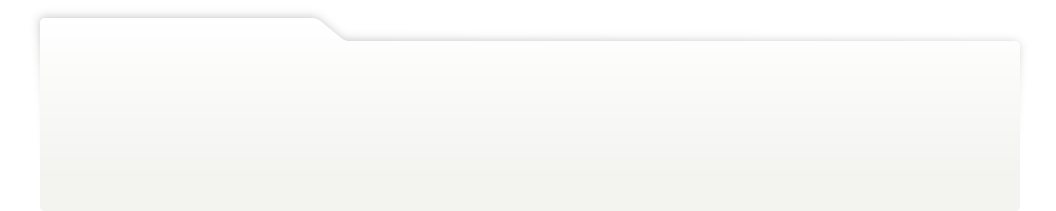
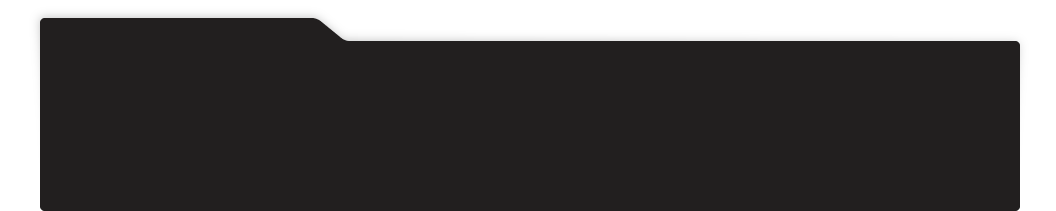
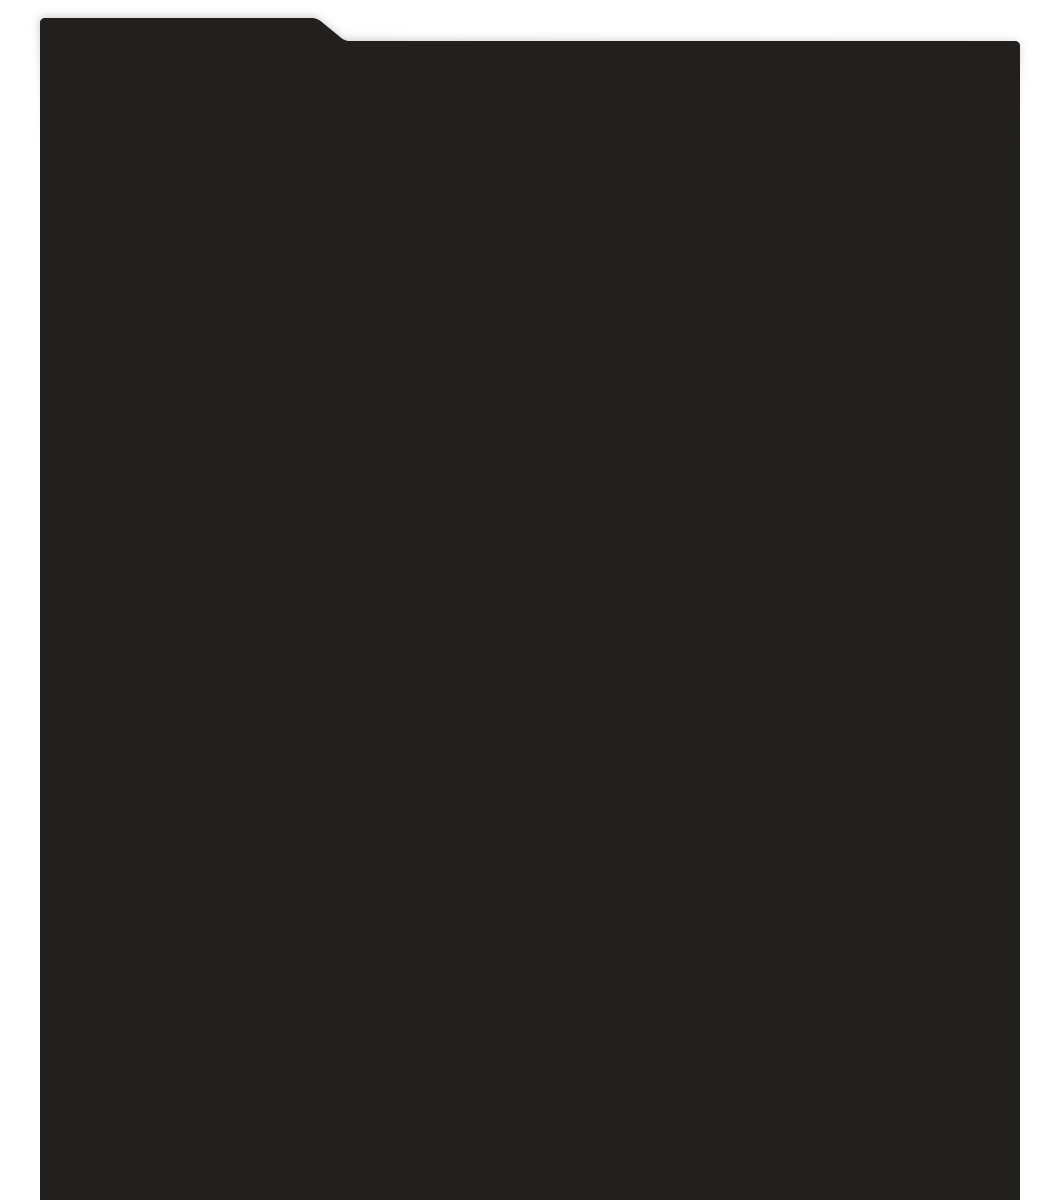
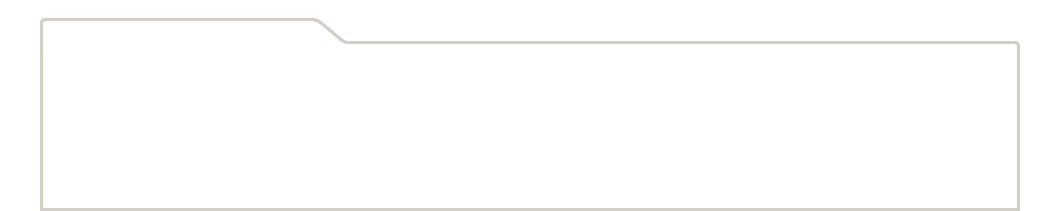
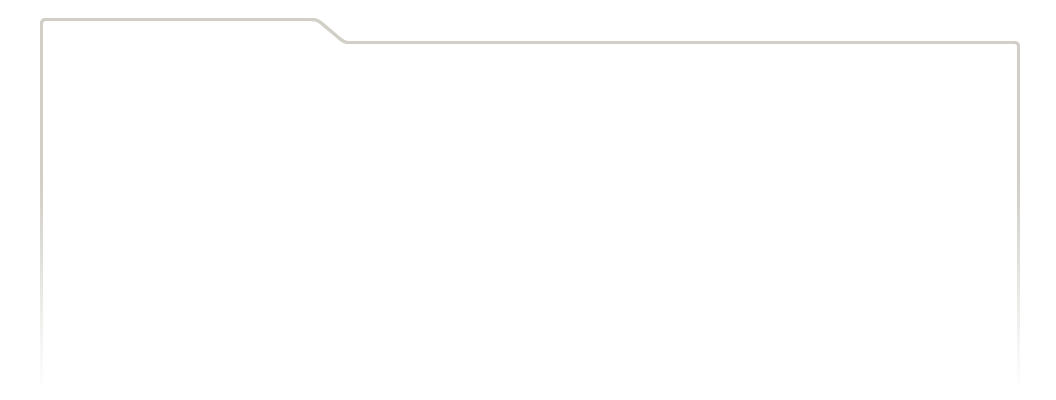
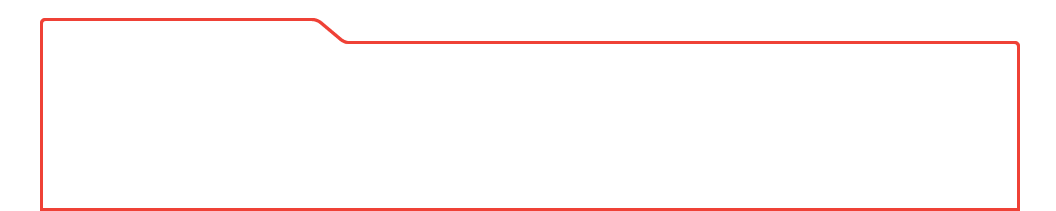
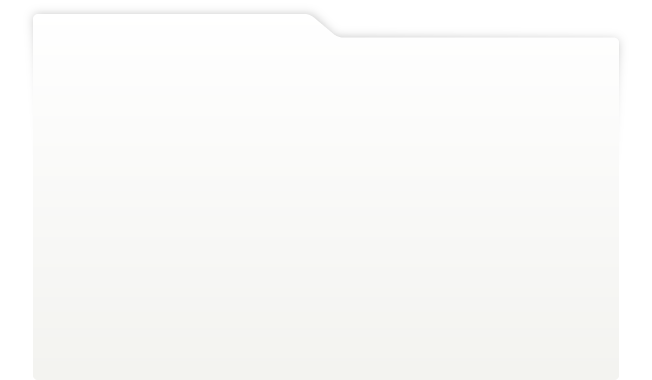
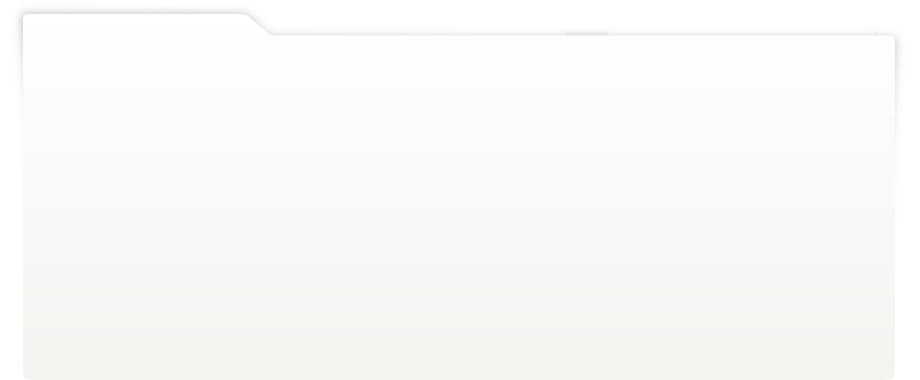
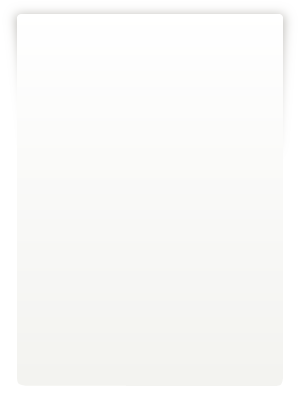
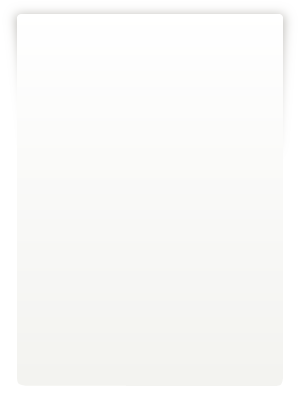
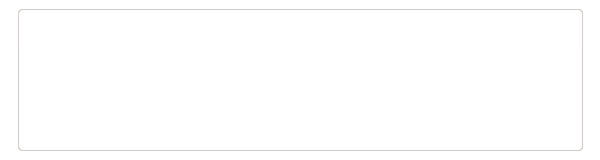
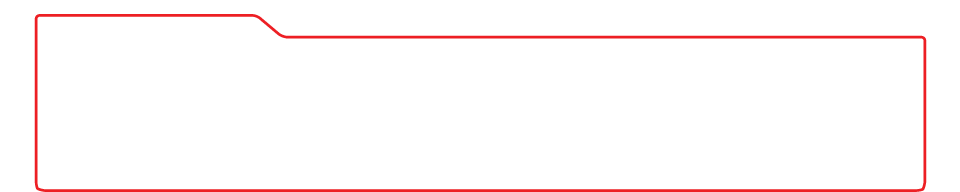
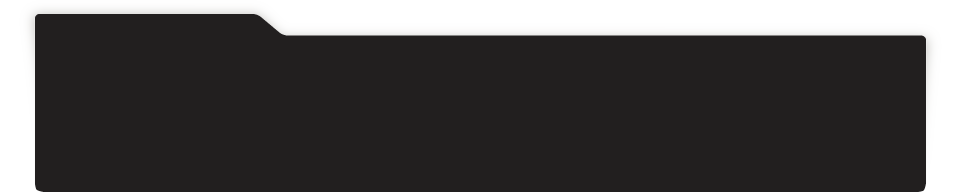
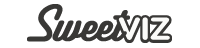
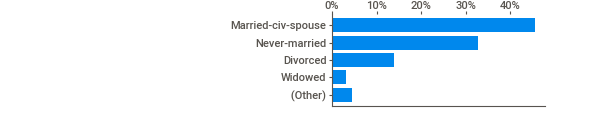
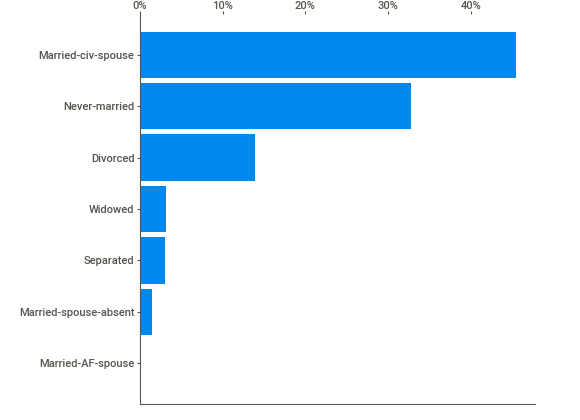
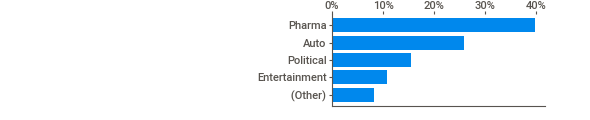
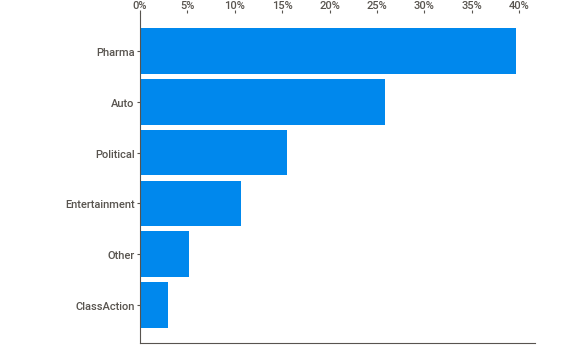
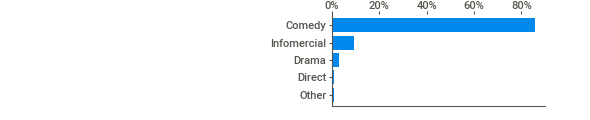
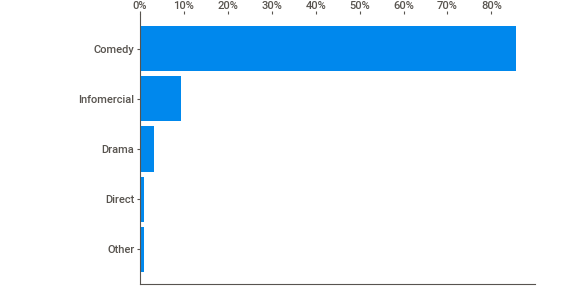
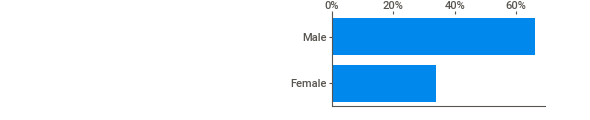
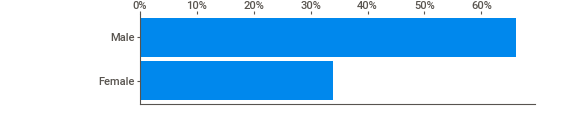
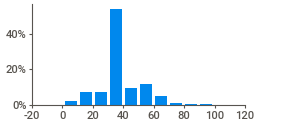
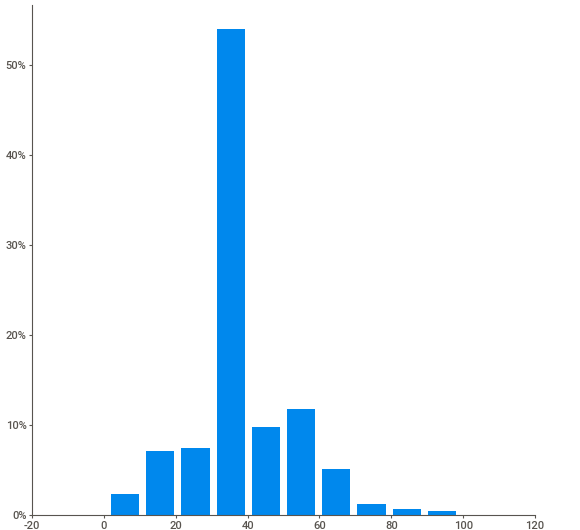
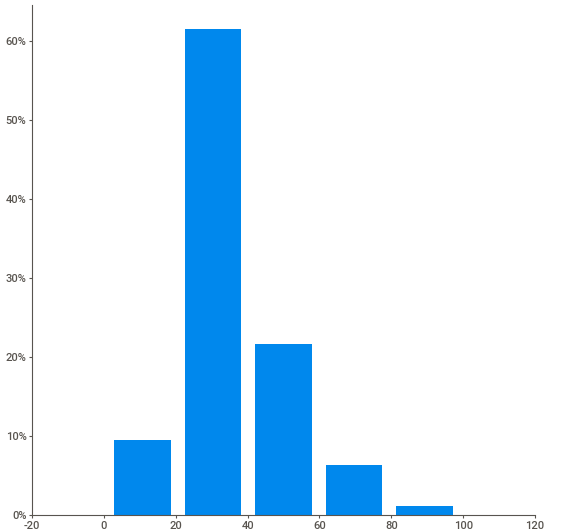
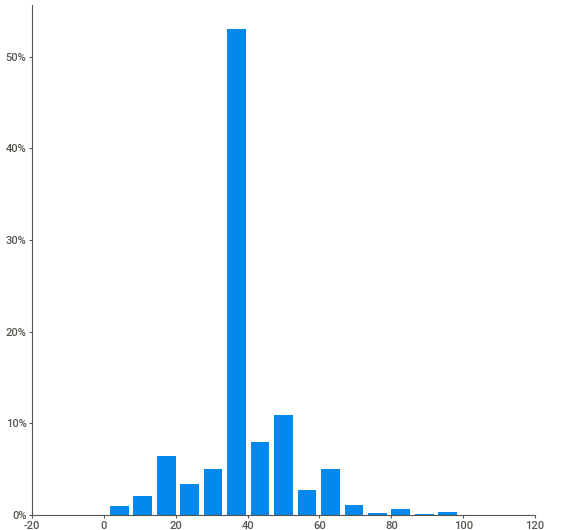
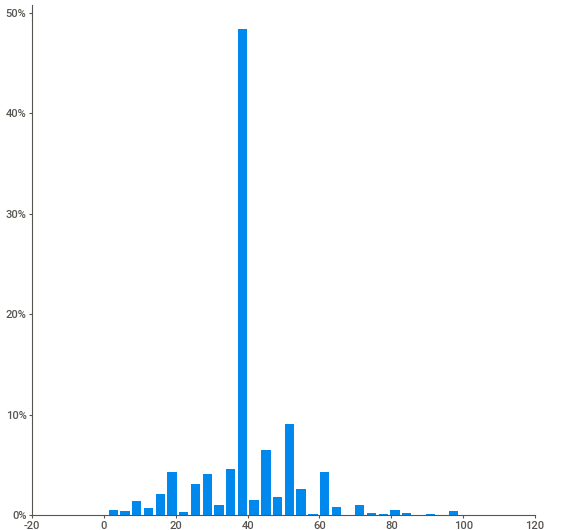
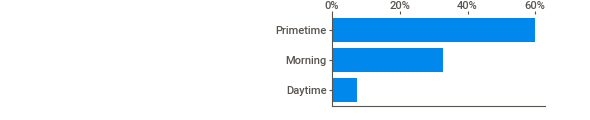
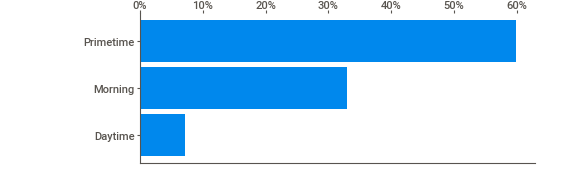
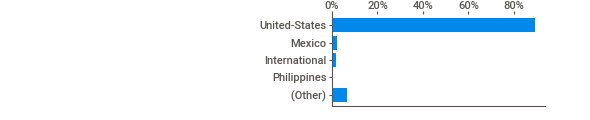
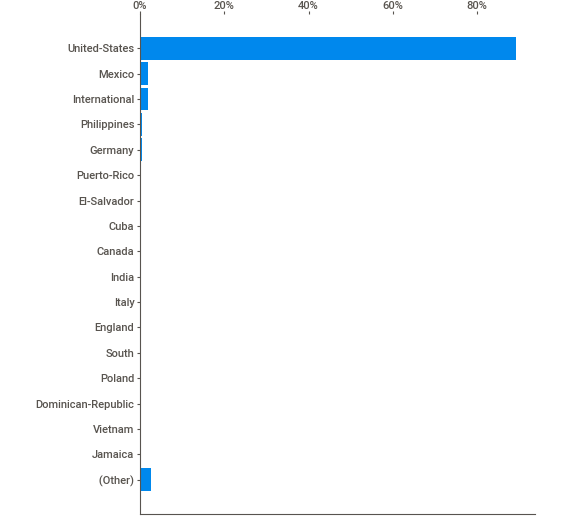
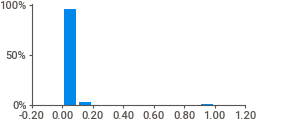
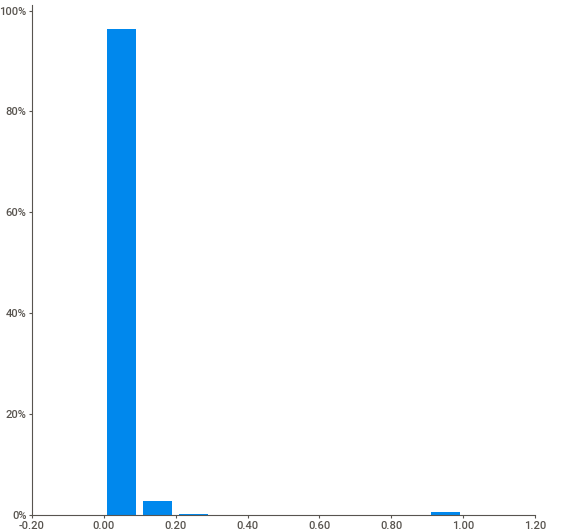
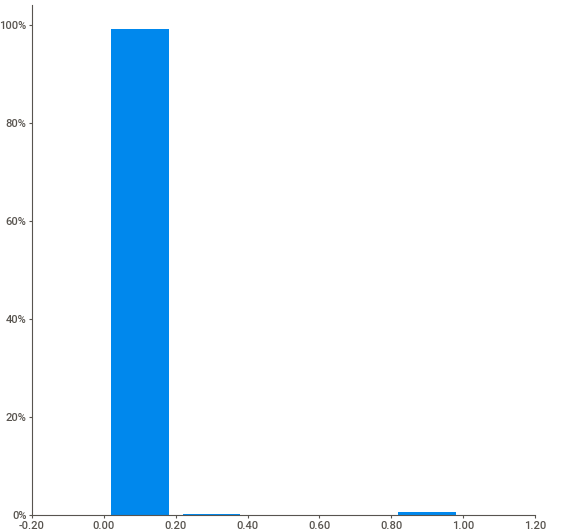
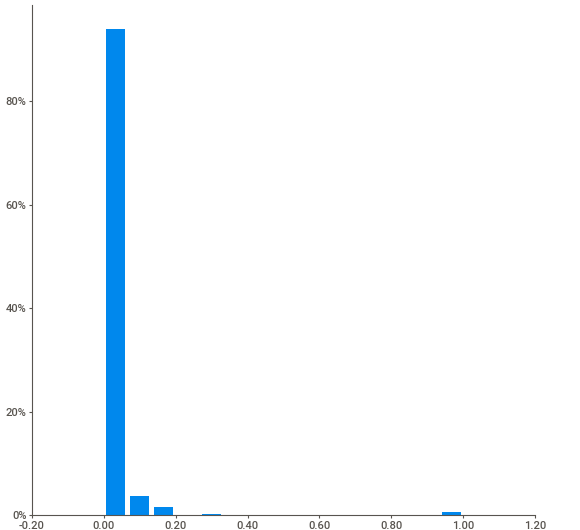
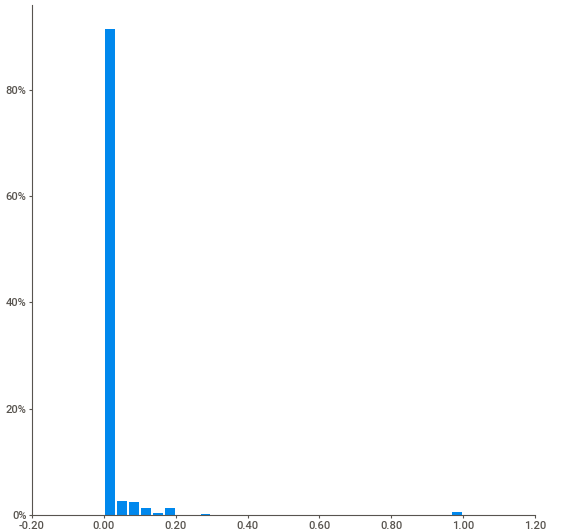
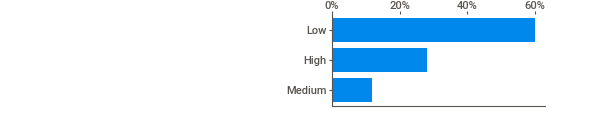
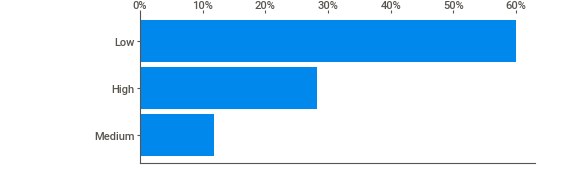
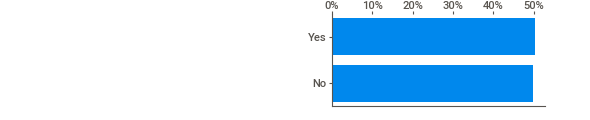
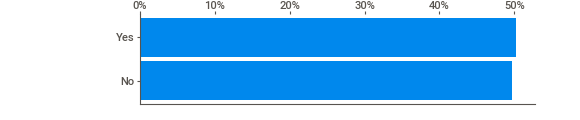
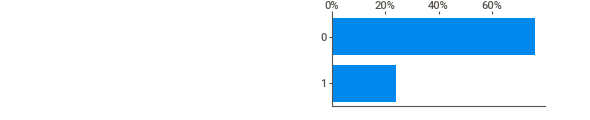
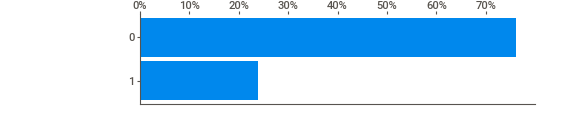
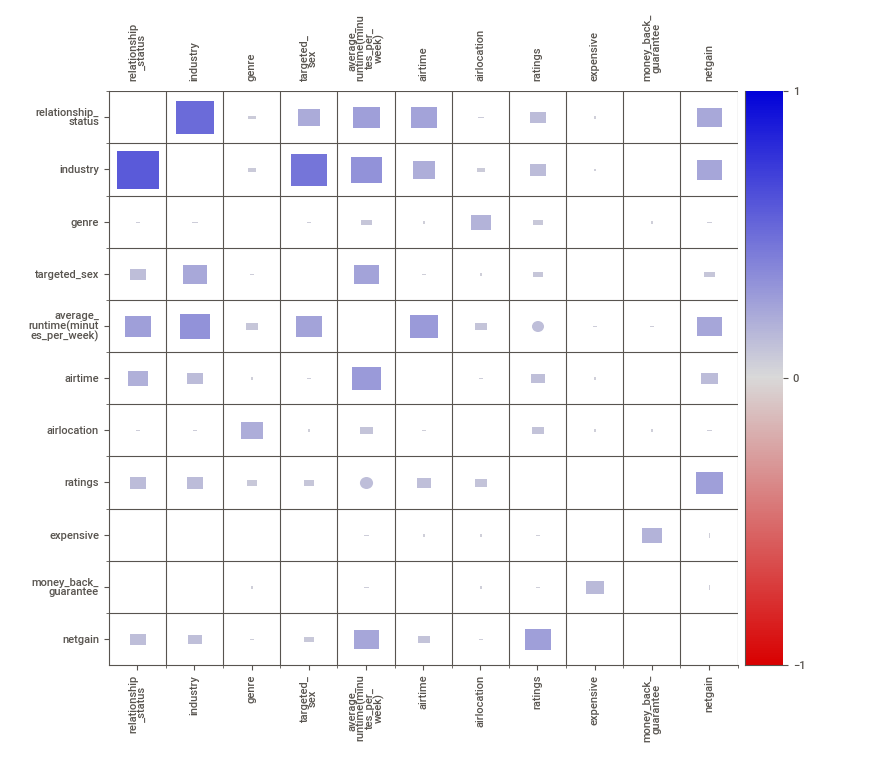
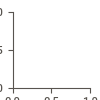

In [270]:
# profile = ProfileReport(df=train_df)
# profile.to_file(output_file='Pre_Profiling_Report.html')
# print('Accomplished!')
import sweetviz as sv
analyze_report = sv.analyze(train_df)
#analyze_report.show_html('train_df_sweetviz_report.html')
analyze_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


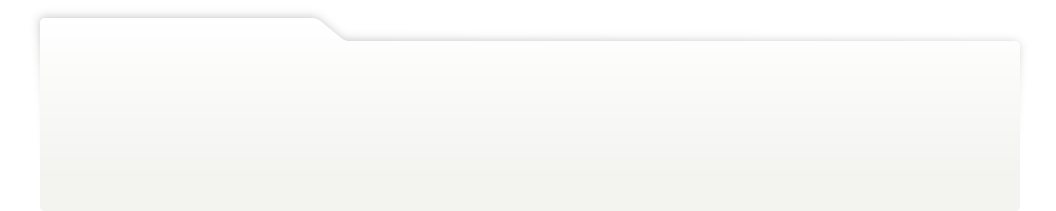
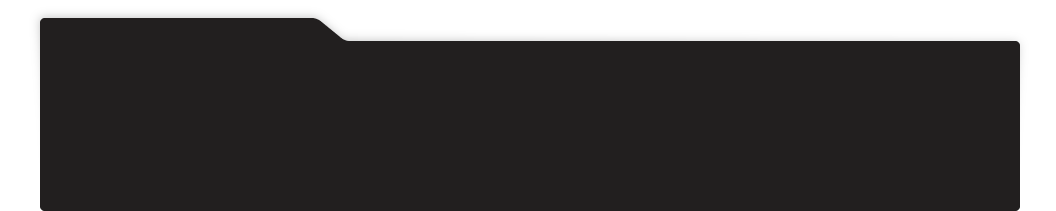
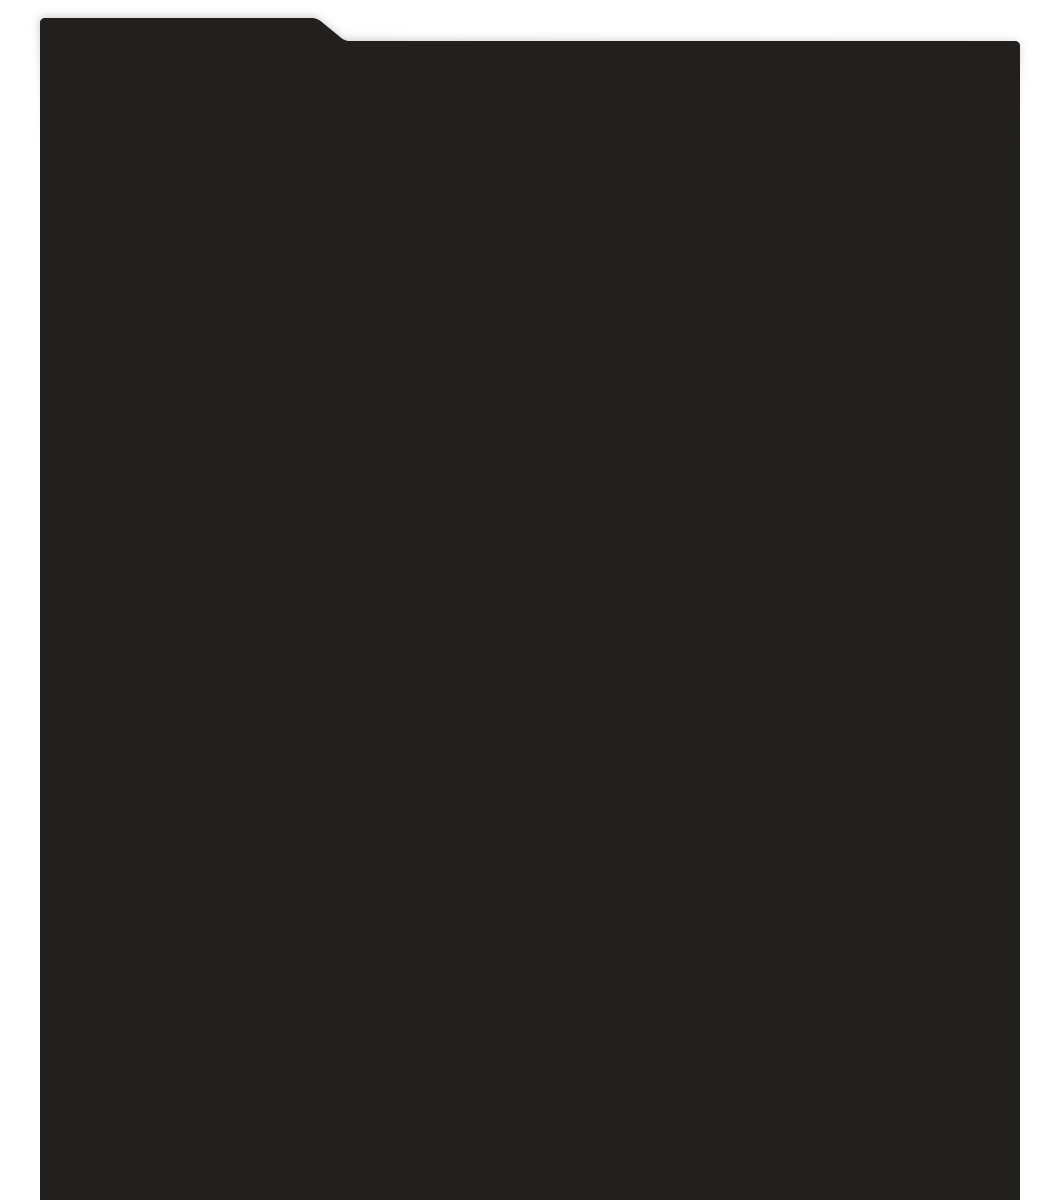
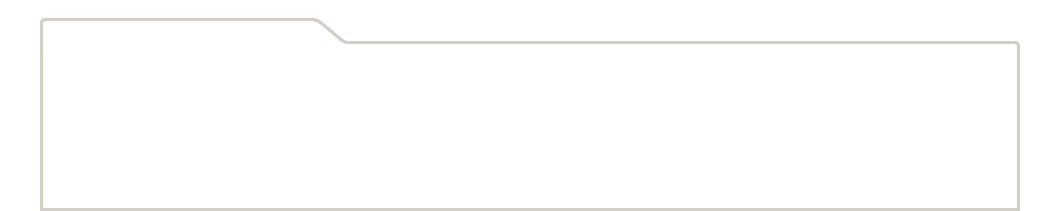
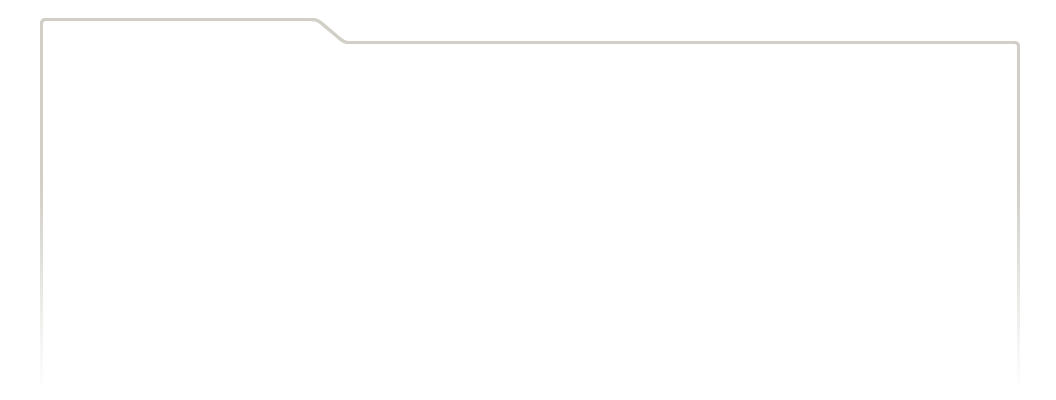
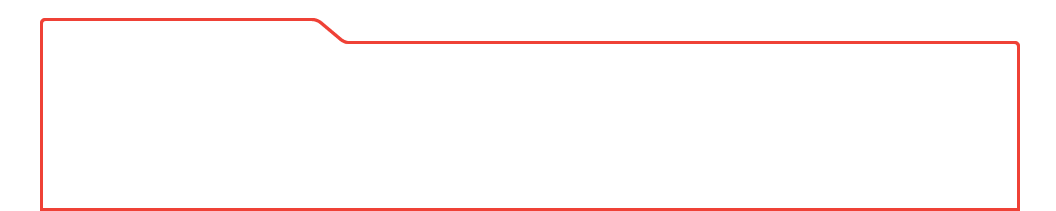
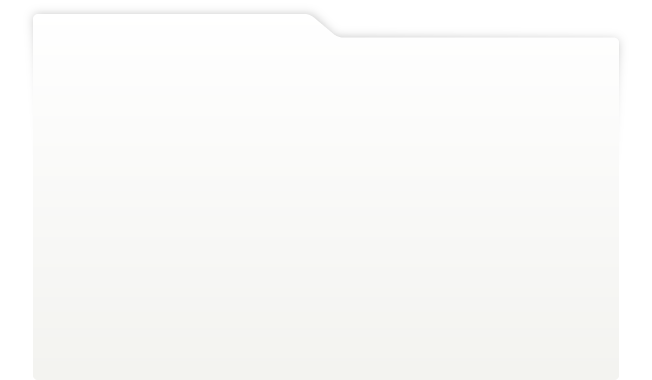
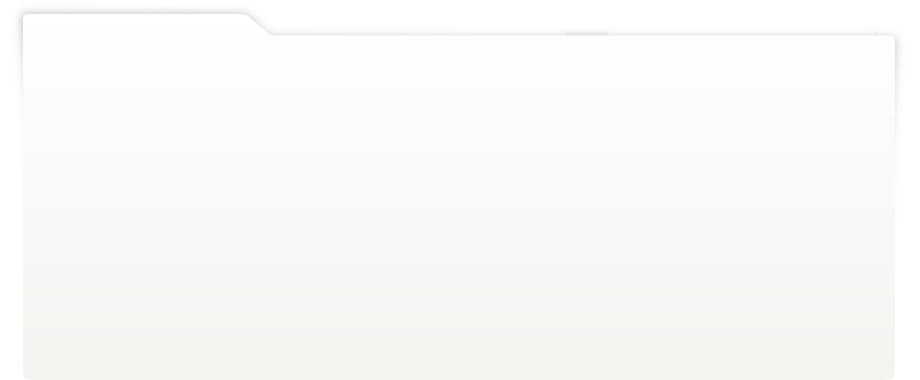
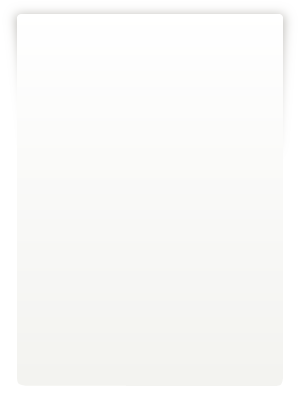
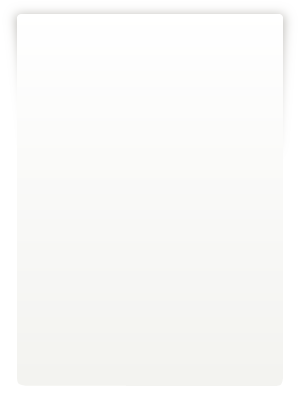
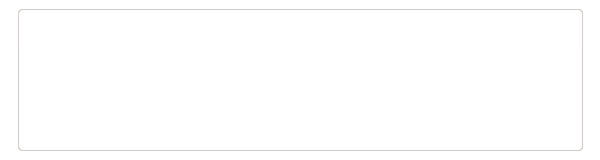
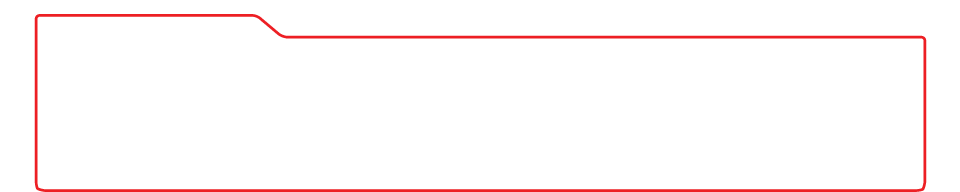
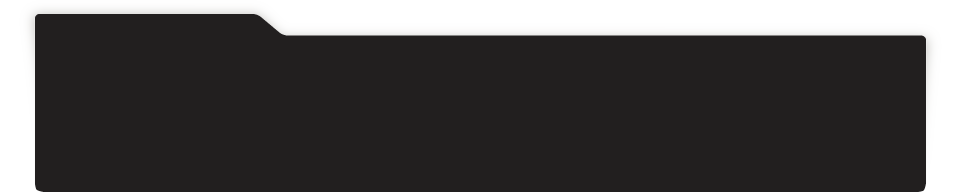
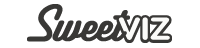
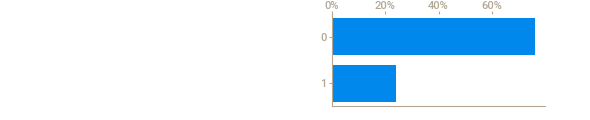
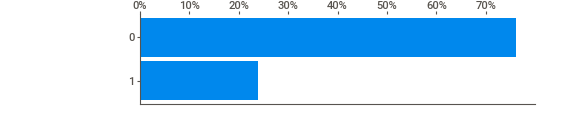
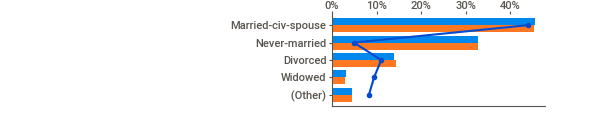
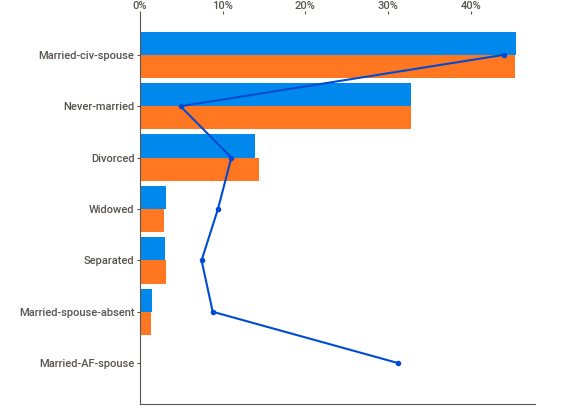
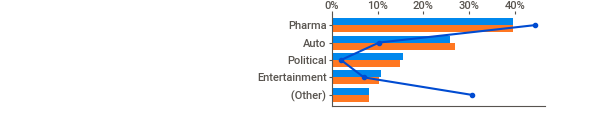
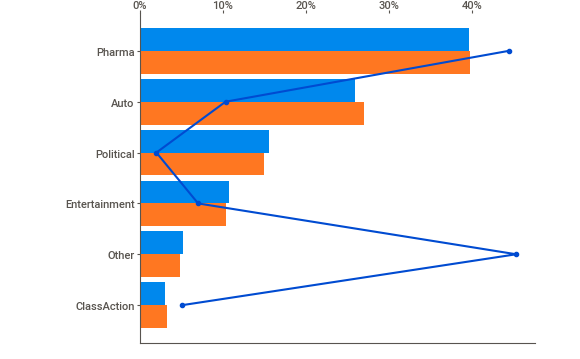
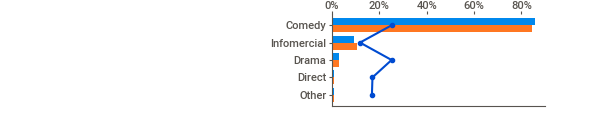
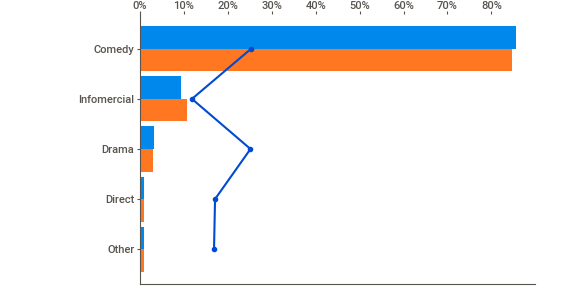
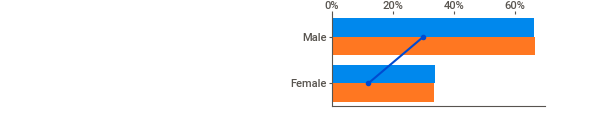
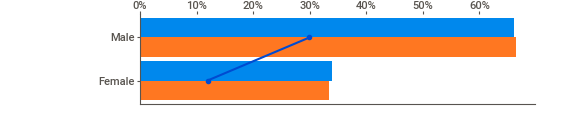
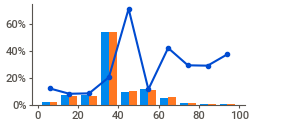
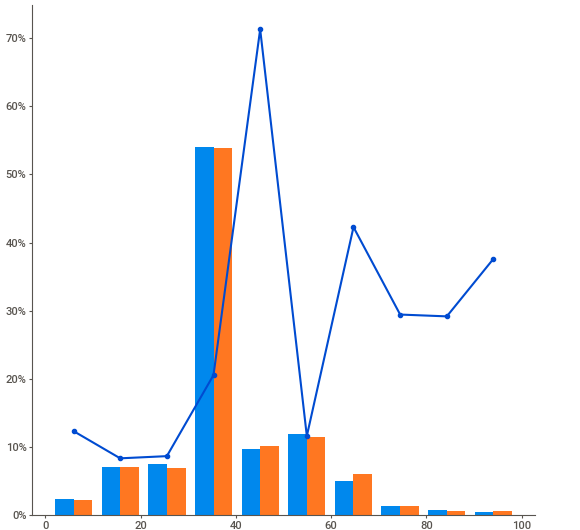
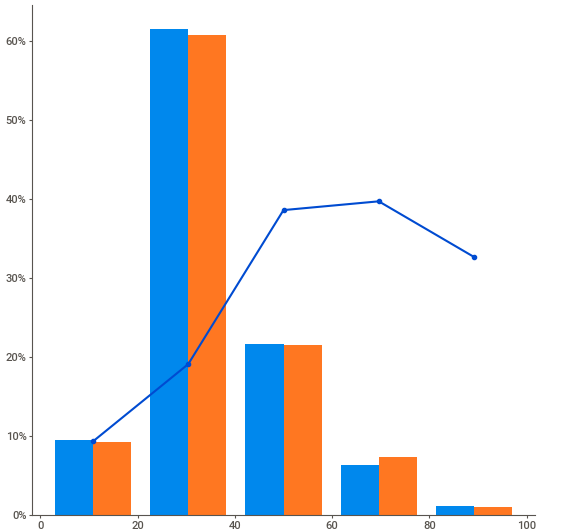
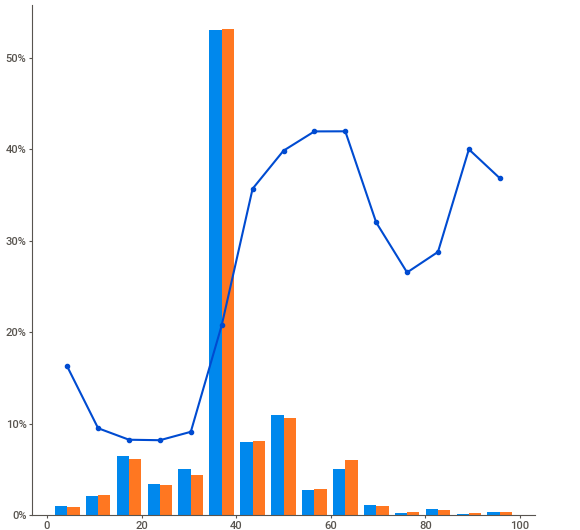
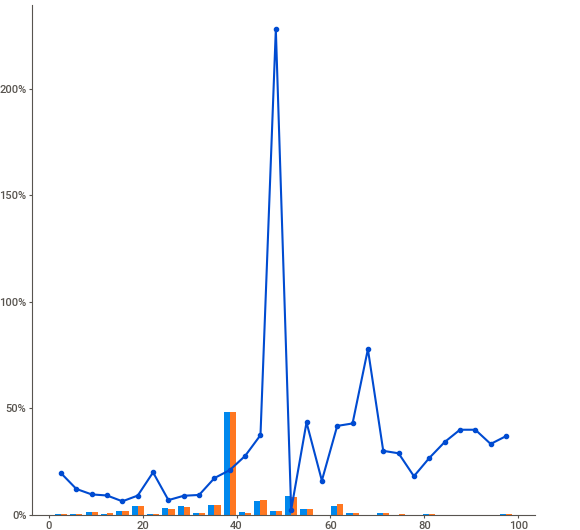
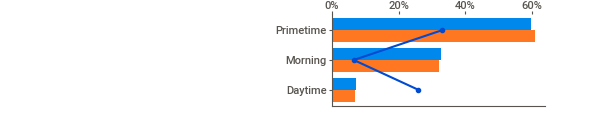
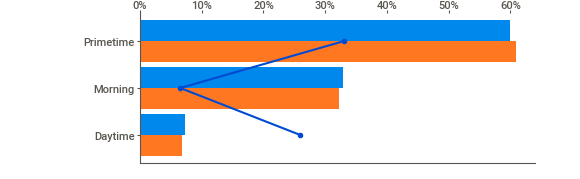
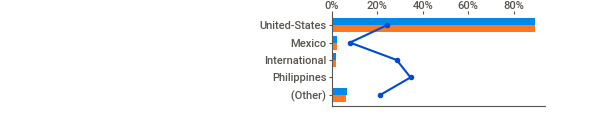
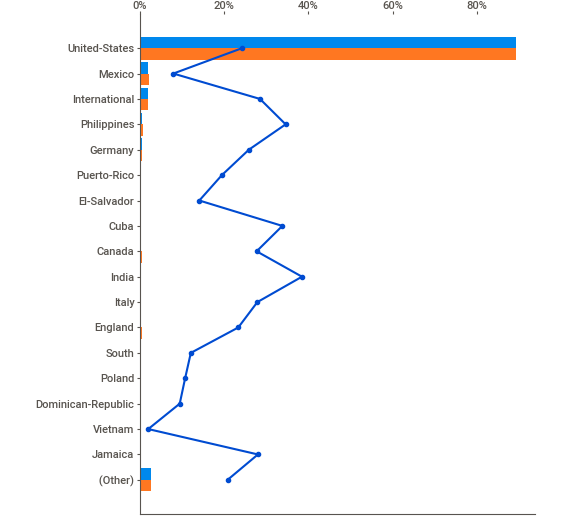
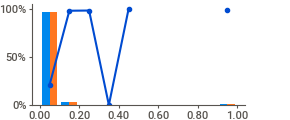
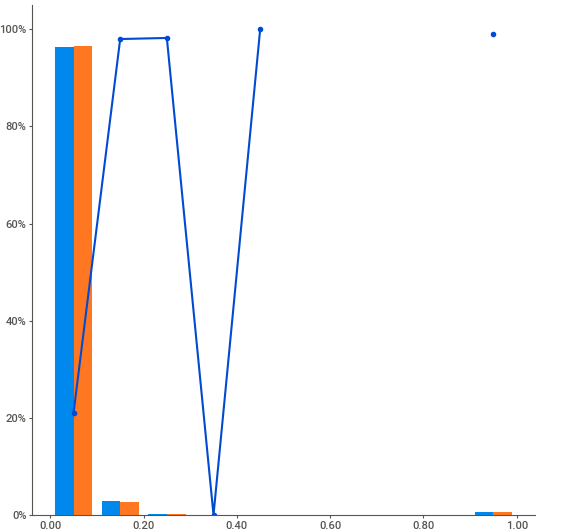
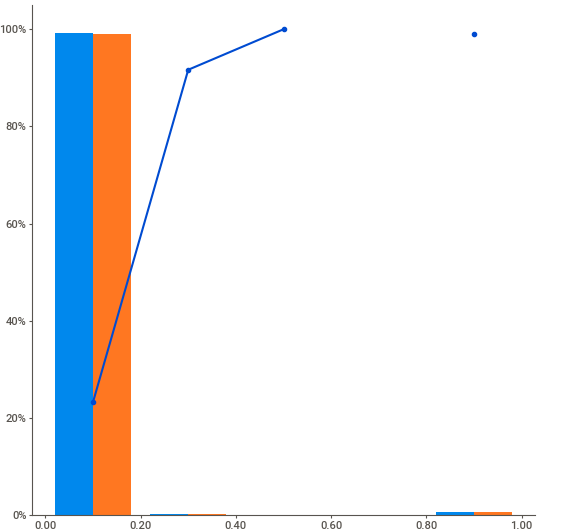
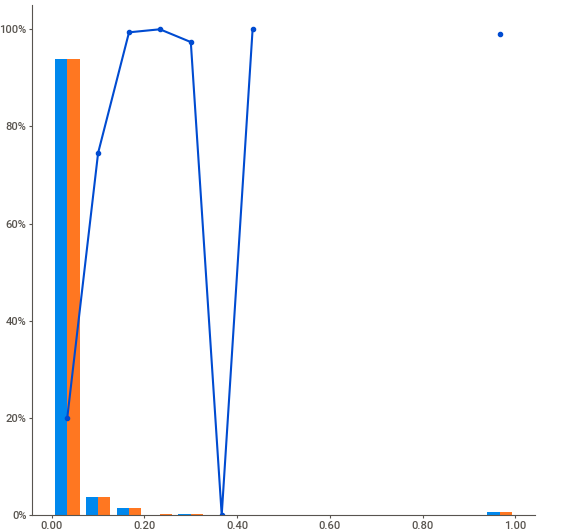
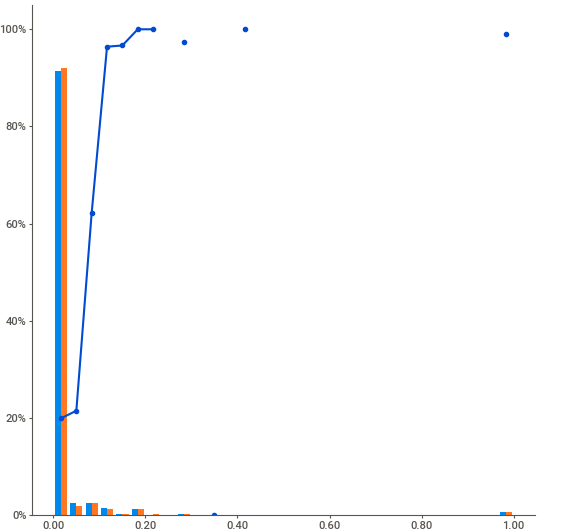
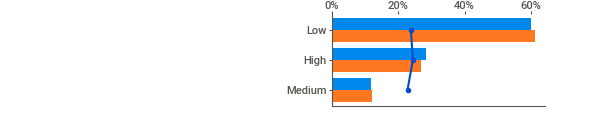
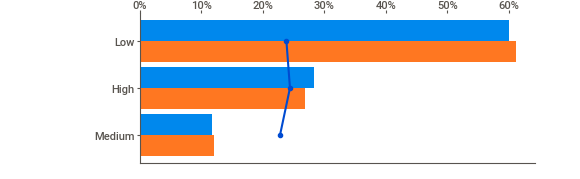
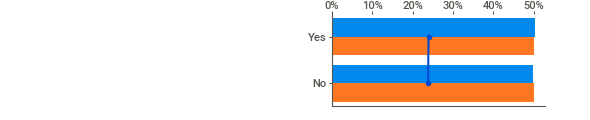
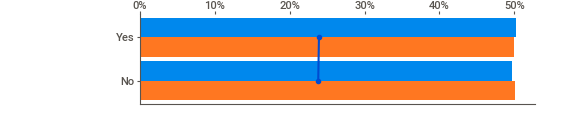
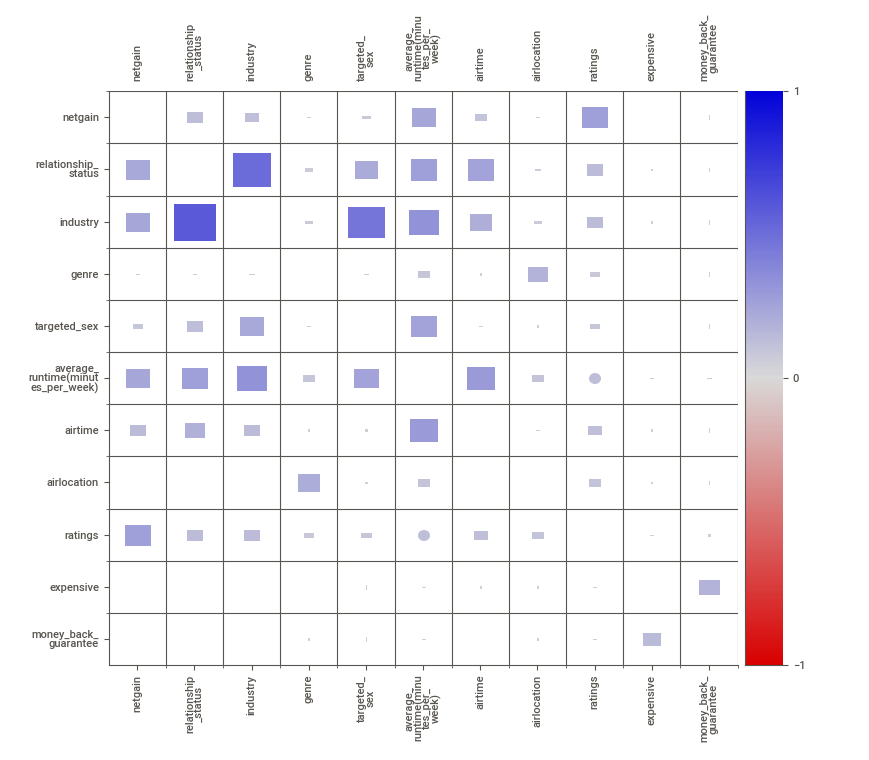
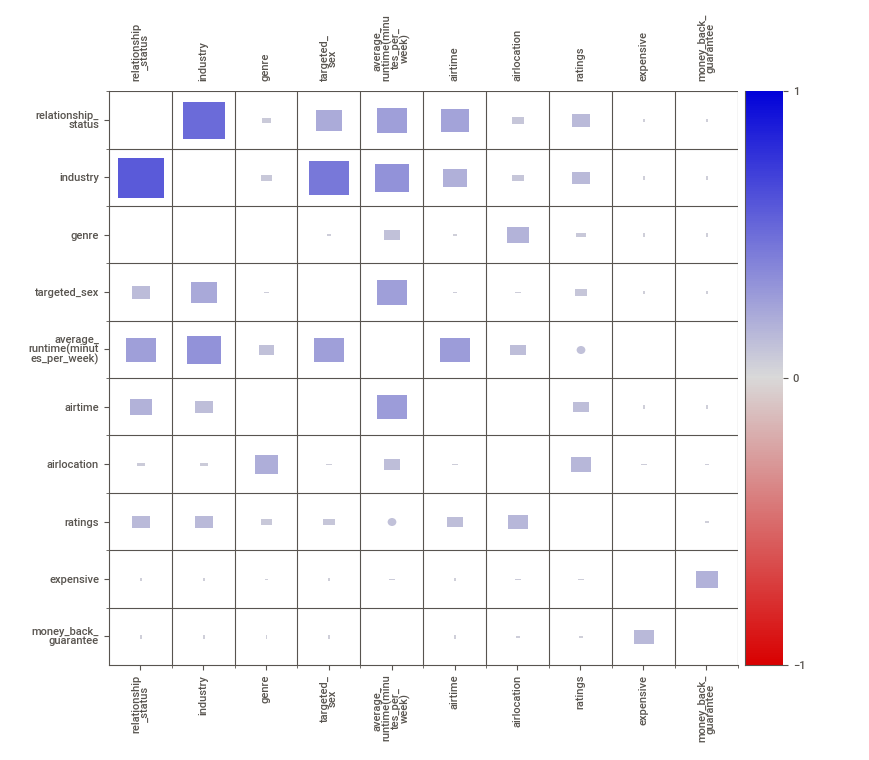

In [271]:
comparison_report = sv.compare([train_df, "Train"], [test_df, "Test"], "netgain")
#comparison_report.show_html("Report.html") # Not providing a filename will default to SWEETVIZ_REPORT.html
comparison_report.show_notebook()

<a name = section32></a>
### **3.2 Data Pre-Processing**

- We need to pre process few features before EDA and Model Evaluation as needed

In [272]:
# display summary of dataset structure
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20838 entries, 28237 to 28355
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   relationship_status                20838 non-null  object 
 1   industry                           20838 non-null  object 
 2   genre                              20838 non-null  object 
 3   targeted_sex                       20838 non-null  object 
 4   average_runtime(minutes_per_week)  20838 non-null  int64  
 5   airtime                            20838 non-null  object 
 6   airlocation                        20838 non-null  object 
 7   ratings                            20838 non-null  float64
 8   expensive                          20838 non-null  object 
 9   money_back_guarantee               20838 non-null  object 
 10  netgain                            20838 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1

<a name = section33></a>
### **3.3 Data Post-Profiling**

- We can run the pandas profiling report to get latest information

In [273]:
# post_profile=ProfileReport(df=train_df)
# post_profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- Not Applicable

<a name = section4></a>

---
# **4. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

What is the correlation between numeric variables?

Text(0.5, 1.0, 'Correlation between Numerical features')

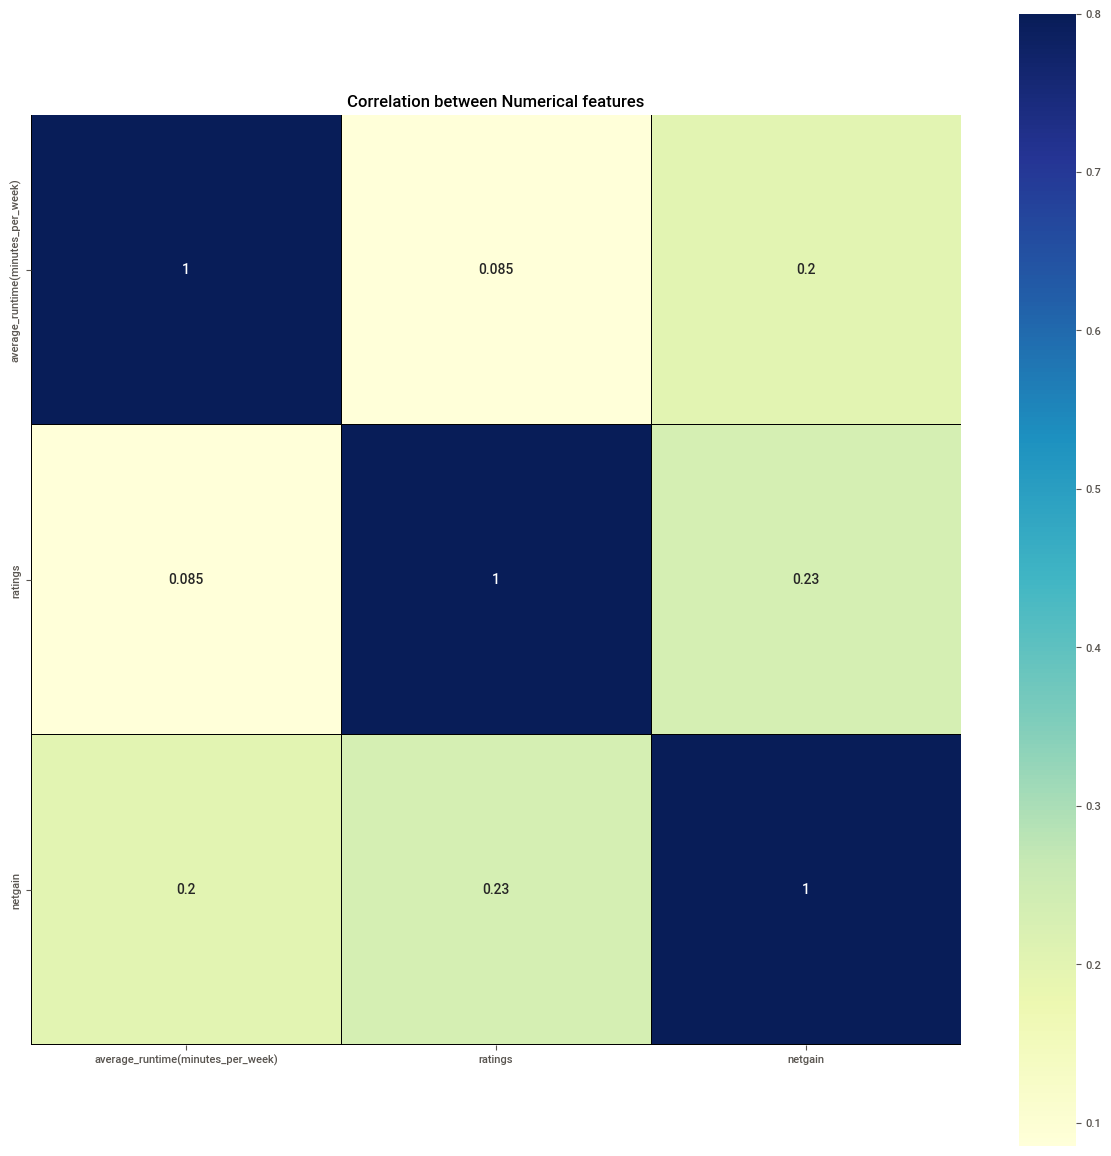

In [274]:
#Check corelation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = train_df.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features')

**Observations:**

- TBD

What is the relationship between numeric variables?

In [275]:
# plot pairwise relationship in a dataset
# plt.figure(figsize=(50,25))
# sns.pairplot(data=train_df,palette='rainbow',diag_kind='kde')
# plt.show()

**Observations:**

- TBD

In [276]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
train_df.cov()

,average_runtime(minutes_per_week),ratings,netgain
average_runtime(minutes_per_week),155.722285,0.080071,1.064014
ratings,0.080071,0.005655,0.007405
netgain,1.064014,0.007405,0.181655


<a name = section5></a>

---
# **5. Data Post-Processing**
---


<a name = section51></a>
### **5.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and drop any column as necessary

In [277]:
# extract target variable
y = train_df['netgain']

In [278]:
# check for missing value
y.isna().sum()

0

In [279]:
#check shape of variable
y.shape

(20838,)

In [280]:
y.head()

id
28237    0
24181    0
22514    0
16294    0
8734     0
Name: netgain, dtype: int64

In [281]:
# convert categorical variable into numeric by encoding for train dataset
X_encoded = pd.get_dummies(train_df, columns=['relationship_status', 'industry', 'genre', 'targeted_sex', 'airtime', 'airlocation', 'expensive', 'money_back_guarantee'], drop_first=True)
# drop target column 
X = X_encoded.drop(columns=['netgain'],axis=1)

In [282]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20838 entries, 28237 to 28355
Data columns (total 64 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   average_runtime(minutes_per_week)          20838 non-null  int64  
 1   ratings                                    20838 non-null  float64
 2   relationship_status_Married-AF-spouse      20838 non-null  uint8  
 3   relationship_status_Married-civ-spouse     20838 non-null  uint8  
 4   relationship_status_Married-spouse-absent  20838 non-null  uint8  
 5   relationship_status_Never-married          20838 non-null  uint8  
 6   relationship_status_Separated              20838 non-null  uint8  
 7   relationship_status_Widowed                20838 non-null  uint8  
 8   industry_ClassAction                       20838 non-null  uint8  
 9   industry_Entertainment                     20838 non-null  uint8  
 10  industry_Other    

In [283]:
# check new dataset
X.head()

,average_runtime(minutes_per_week),ratings,relationship_status_Married-AF-spouse,relationship_status_Married-civ-spouse,relationship_status_Married-spouse-absent,relationship_status_Never-married,relationship_status_Separated,relationship_status_Widowed,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,targeted_sex_Male,airtime_Morning,airtime_Primetime,airlocation_Canada,airlocation_China,airlocation_Columbia,airlocation_Cuba,airlocation_Dominican-Republic,airlocation_Ecuador,airlocation_El-Salvador,airlocation_England,airlocation_France,airlocation_Germany,airlocation_Greece,airlocation_Guatemala,airlocation_Haiti,airlocation_Holand-Netherlands,airlocation_Honduras,airlocation_Hong,airlocation_Hungary,airlocation_India,airlocation_International,airlocation_Iran,airlocation_Ireland,airlocation_Italy,airlocation_Jamaica,airlocation_Japan,airlocation_Laos,airlocation_Mexico,airlocation_Nicaragua,airlocation_Outlying-US(Guam-USVI-etc),airlocation_Peru,airlocation_Philippines,airlocation_Poland,airlocation_Portugal,airlocation_Puerto-Rico,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
28237,50,0.027465,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
24181,25,0.064596,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
22514,40,0.027465,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
16294,36,0.027465,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8734,30,0.027465,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [284]:
# convert categorical variable into numeric by encoding for test dataset
X_test = pd.get_dummies(test_df, columns=['relationship_status', 'industry', 'genre', 'targeted_sex', 'airtime', 'airlocation', 'expensive', 'money_back_guarantee'], drop_first=True)

In [285]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5210 entries, 23855 to 27822
Data columns (total 64 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   average_runtime(minutes_per_week)          5210 non-null   int64  
 1   ratings                                    5210 non-null   float64
 2   relationship_status_Married-AF-spouse      5210 non-null   uint8  
 3   relationship_status_Married-civ-spouse     5210 non-null   uint8  
 4   relationship_status_Married-spouse-absent  5210 non-null   uint8  
 5   relationship_status_Never-married          5210 non-null   uint8  
 6   relationship_status_Separated              5210 non-null   uint8  
 7   relationship_status_Widowed                5210 non-null   uint8  
 8   industry_ClassAction                       5210 non-null   uint8  
 9   industry_Entertainment                     5210 non-null   uint8  
 10  industry_Other     

In [286]:
# check new dataset
X_test.head()

,average_runtime(minutes_per_week),ratings,relationship_status_Married-AF-spouse,relationship_status_Married-civ-spouse,relationship_status_Married-spouse-absent,relationship_status_Never-married,relationship_status_Separated,relationship_status_Widowed,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,targeted_sex_Male,airtime_Morning,airtime_Primetime,airlocation_Canada,airlocation_China,airlocation_Columbia,airlocation_Cuba,airlocation_Dominican-Republic,airlocation_Ecuador,airlocation_El-Salvador,airlocation_England,airlocation_France,airlocation_Germany,airlocation_Greece,airlocation_Guatemala,airlocation_Haiti,airlocation_Holand-Netherlands,airlocation_Honduras,airlocation_Hong,airlocation_Hungary,airlocation_India,airlocation_International,airlocation_Iran,airlocation_Ireland,airlocation_Italy,airlocation_Jamaica,airlocation_Japan,airlocation_Laos,airlocation_Mexico,airlocation_Nicaragua,airlocation_Outlying-US(Guam-USVI-etc),airlocation_Peru,airlocation_Philippines,airlocation_Poland,airlocation_Portugal,airlocation_Puerto-Rico,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
23855,40,0.027465,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3068,40,0.027465,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4230,30,0.027465,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3515,40,0.027465,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10404,40,0.027465,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


<a name = section52></a>
### **5.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [287]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

<a name = section53></a>
### **5.3 Data Scaling**

- Using StandardScaler

In [288]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [289]:
X_test_scaled = scaler.transform(X_test)

In [290]:
#normalizer.adapt(np.array(X_train))

In [291]:
#print(normalizer.mean.numpy())

In [292]:
X_train_scaled[:5]

array([[-2.0125266 ,  0.17334524, -0.0244998 ,  1.09946564, -0.12513321,
        -0.70056318, -0.17548209, -0.18085824, -0.17620722, -0.34498877,
        -0.23122088,  1.23707648, -0.43124286, -0.09906273,  5.48113406,
        -0.32085964, -0.09301886,  0.72160093, -0.70027774, -1.22107906,
        -0.05373769, -0.04652141, -0.04779908, -0.05700772, -0.05025793,
        -0.03551531, -0.06060287, -0.0542962 , -0.03195054, -0.06767547,
        -0.02191197, -0.04716454, -0.03287782, -0.00774542, -0.0244998 ,
        -0.02191197, -0.01341627, -0.05700772, -0.13375704, -0.03717029,
        -0.02683979, -0.05700772, -0.04904377, -0.04716454, -0.02569638,
        -0.14298826, -0.03287782, -0.01732137, -0.03287782, -0.07284888,
        -0.05317337, -0.03195054, -0.05857515, -0.02191197, -0.05373769,
        -0.03875503, -0.02191197, -0.02324185,  0.34802943, -0.05025793,
        -0.03001051,  0.82068676, -0.36702633,  0.9960486 ],
       [-1.93263591, -0.14959119, -0.0244998 , -0.90953274, -0.

<a name = section6></a>

---
# **6. Model Development & Evaluation**
---


<a name=section61></a>

### **6.1 Build the Model**

- Let's build our model.

- Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value.

In [293]:
model = tf.keras.Sequential([layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1, activation='sigmoid')
  ])

In [294]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                                                    tf.keras.metrics.Precision(name='precision'),
                                                                    tf.keras.metrics.Recall(name='recall')])

In [295]:
%%time
history = model.fit(X_train_scaled,y_train, verbose=0, epochs=100)

CPU times: user 4min 45s, sys: 39.5 s, total: 5min 24s
Wall time: 3min 50s


<a name=section62></a>

### **6.2 Inspect the Model**

- Using the `.summary` method to print a simple description of the model

In [296]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,385
Trainable params: 8,385
Non-trainable params: 0
_________________________________________________________________


In [297]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize']= (18,8)
rcParams['axes.spines.top']= False
rcParams['axes.spines.right']= False

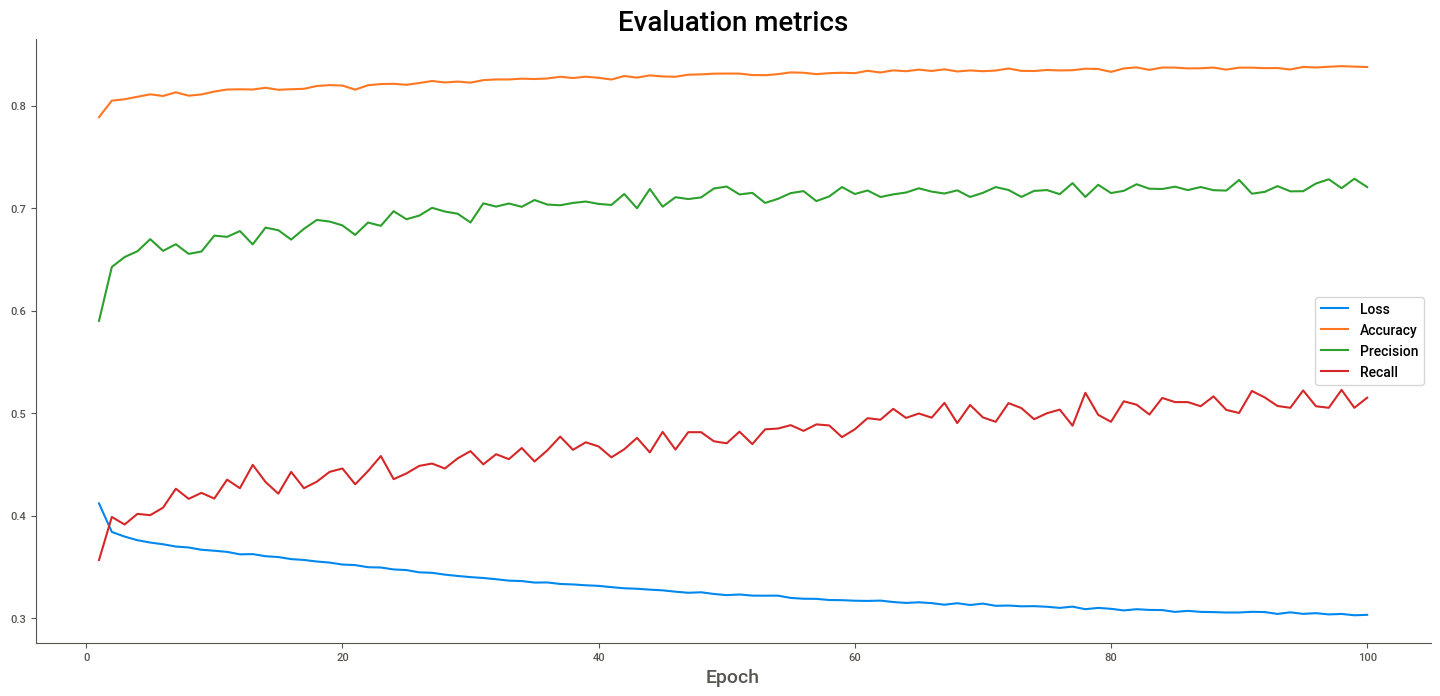

In [298]:
plt.plot(np.arange(1,101), history.history['loss'], label='Loss')
plt.plot(np.arange(1,101), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1,101), history.history['precision'], label='Precision')
plt.plot(np.arange(1,101), history.history['recall'], label='Recall')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

In [299]:
eval_results = {}

In [300]:
eval_results['model'] = model.evaluate(X_valid_scaled, y_valid, verbose=0)

In [323]:
#eval_predictions = model.predict(X_valid_scaled).flatten()
eval_predictions = model.predict(X_valid_scaled)

In [324]:
eval_predictions[:5]

array([[0.39400873],
       [0.12208045],
       [0.9165809 ],
       [0.90422565],
       [0.00622578]], dtype=float32)

ROC_AUC Score :  0.8353215237810498
Function for ROC_AUC Score :  0.8353215237810498
Threshold value is: 0.24656236


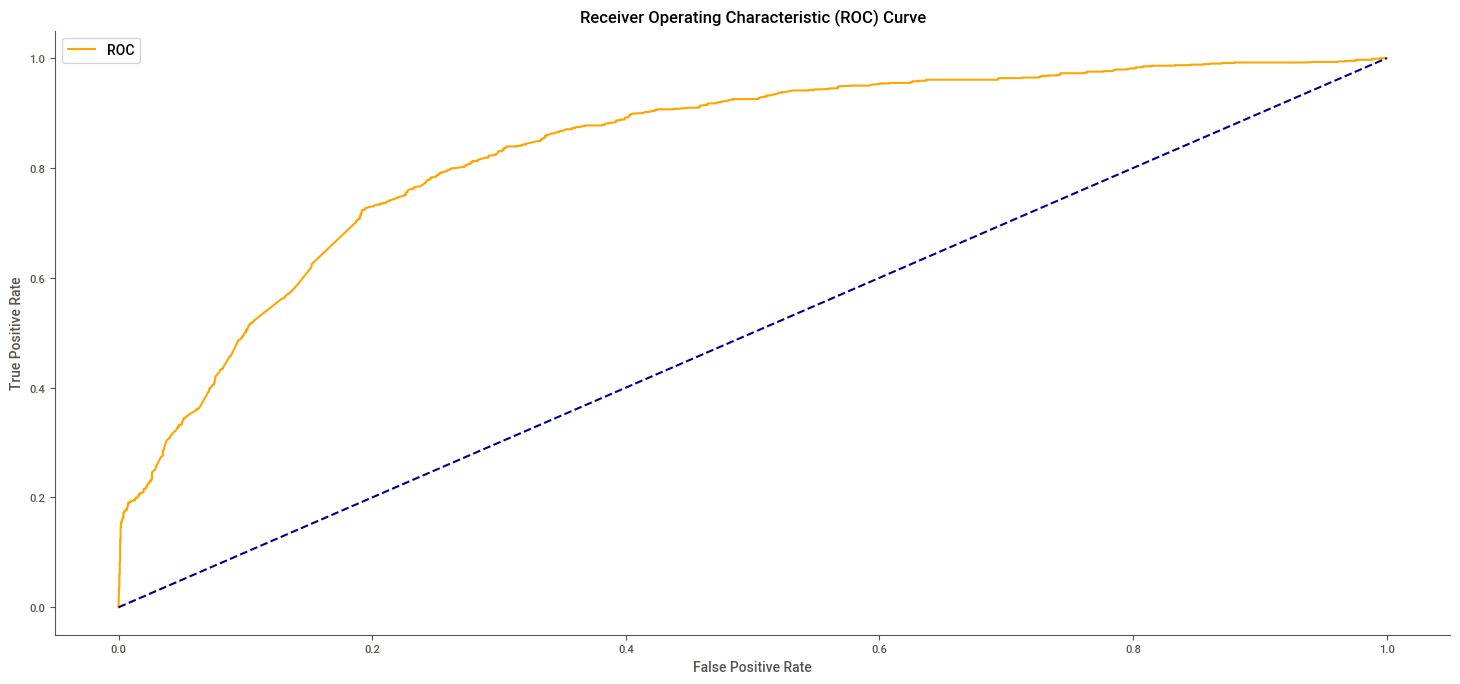

In [325]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
# Computing manually fpr, tpr, thresholds and roc auc 
fpr, tpr, thresholds = roc_curve(y_valid, eval_predictions)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score : ",roc_auc)
print("Function for ROC_AUC Score : ",roc_auc_score(y_valid, eval_predictions)) # Function present
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [326]:
# convert probabilities into binary label
eval_final_prediction = [1 if prob >optimal_threshold else 0 for prob in np.ravel(eval_predictions)]

In [327]:
eval_final_prediction[:5]

[1, 0, 1, 1, 0]

In [328]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_valid,eval_final_prediction))

[[2343  805]
 [ 212  808]]


In [329]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_valid, eval_final_prediction):.2f}')
print(f'Precision: {precision_score(y_valid, eval_final_prediction):.2f}')
print(f'Recall: {recall_score(y_valid, eval_final_prediction):.2f}')

Accuracy: 0.76
Precision: 0.50
Recall: 0.79


In [330]:
# prediction on test dataset
y_test_pred = model.predict(X_test_scaled).flatten()

In [331]:
y_test_pred

array([0.05750767, 0.04084022, 0.01857406, ..., 0.00314104, 0.05466557,
       0.01745463], dtype=float32)

In [332]:
# convert probabilities into binary label
final_prediction = [1 if prob >0.3 else 0 for prob in np.ravel(y_test_pred)]

In [333]:
final_prediction[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [334]:
output = pd.DataFrame({'Id': test_df.index,'netgain': final_prediction})
output.to_csv('advertisement-success-submission1.csv', index=False, header=False)

**Thank you and Happy Learning.**

---

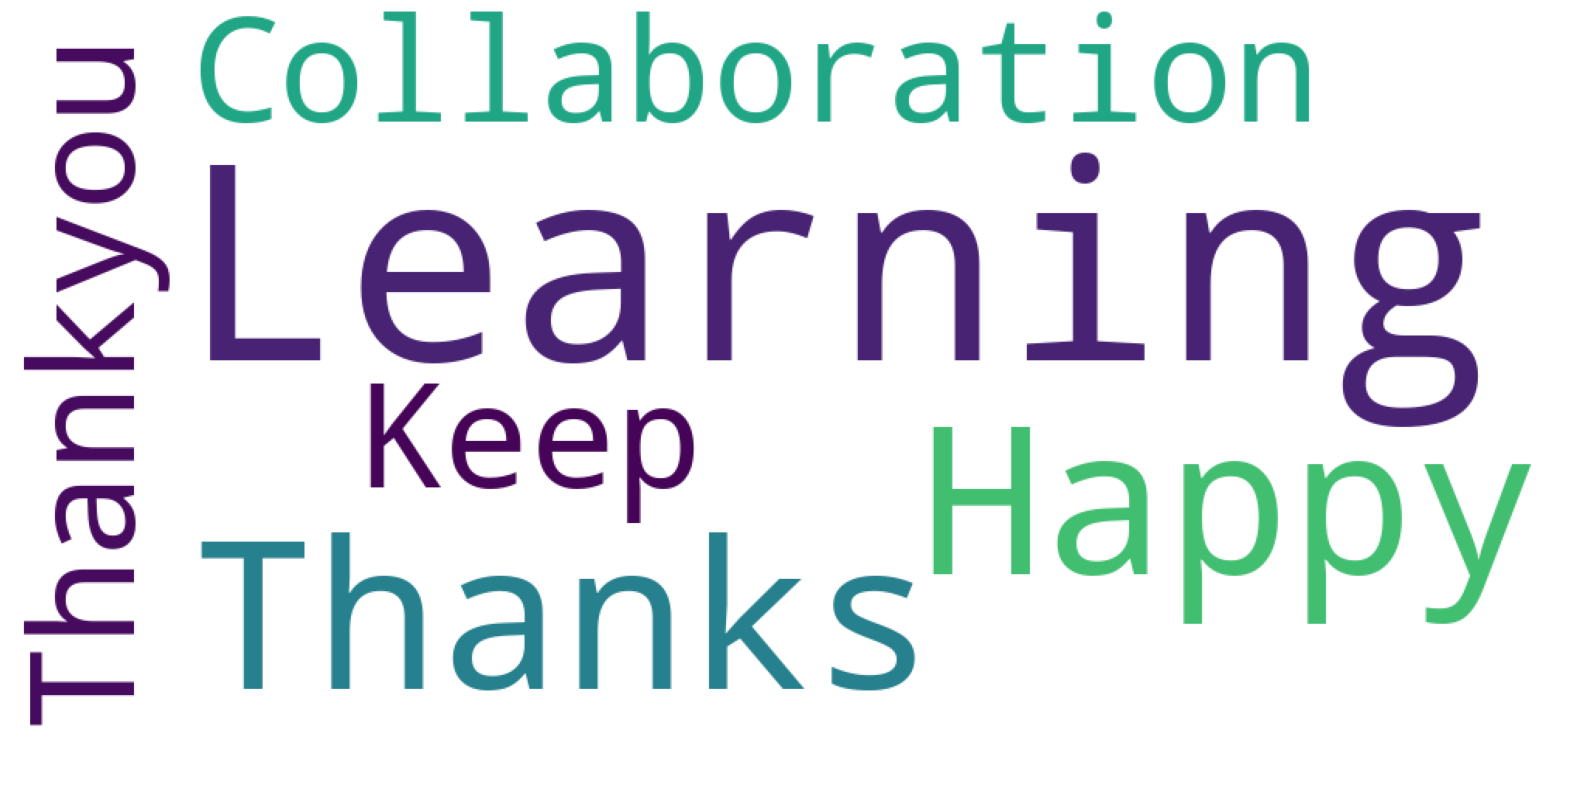

In [313]:
thank_you_str="Thanks,Happy Learning,Collaboration,Thankyou,Keep Learning"
# create WordCloud with converted string
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', collocations=True).generate(thank_you_str)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()